In [1]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini daha iyi görüntülemek için bazı ayarlar yapalım
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [3]:
# Veri setini yükleyelim
# Not: Dosya yolu, notebook'unuzun bulunduğu dizinle aynı olmalıdır.
df = pd.read_excel('Talent_Academy_Case_DT_2025.xlsx')

In [4]:
# Veri setinin boyutlarını kontrol edelim (satır, sütun)
print(f"Veri Seti Boyutları: {df.shape}")

# Sütun isimlerini ve veri tiplerini kontrol edelim
print("\nVeri Seti Bilgileri:")
df.info()

# Veri setinin ilk 5 satırını görüntüleyelim
print("\nVeri Setinin İlk 5 Satırı:")
df.head()

Veri Seti Boyutları: (2235, 13)

Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB

Veri Setinin İlk 5 Satırı:


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [5]:
# Sayısal değişkenlerin istatistiksel özetini alalım
print("Sayısal Değişkenlerin Özeti:")
df.describe().T

Sayısal Değişkenlerin Özeti:


,count,mean,std,min,25%,50%,75%,max
HastaNo,2235.0,145333.100224,115.214248,145134.0,145235.0,145331.0,145432.0,145537.0
Yas,2235.0,47.327069,15.208634,2.0,38.0,46.0,56.0,92.0


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


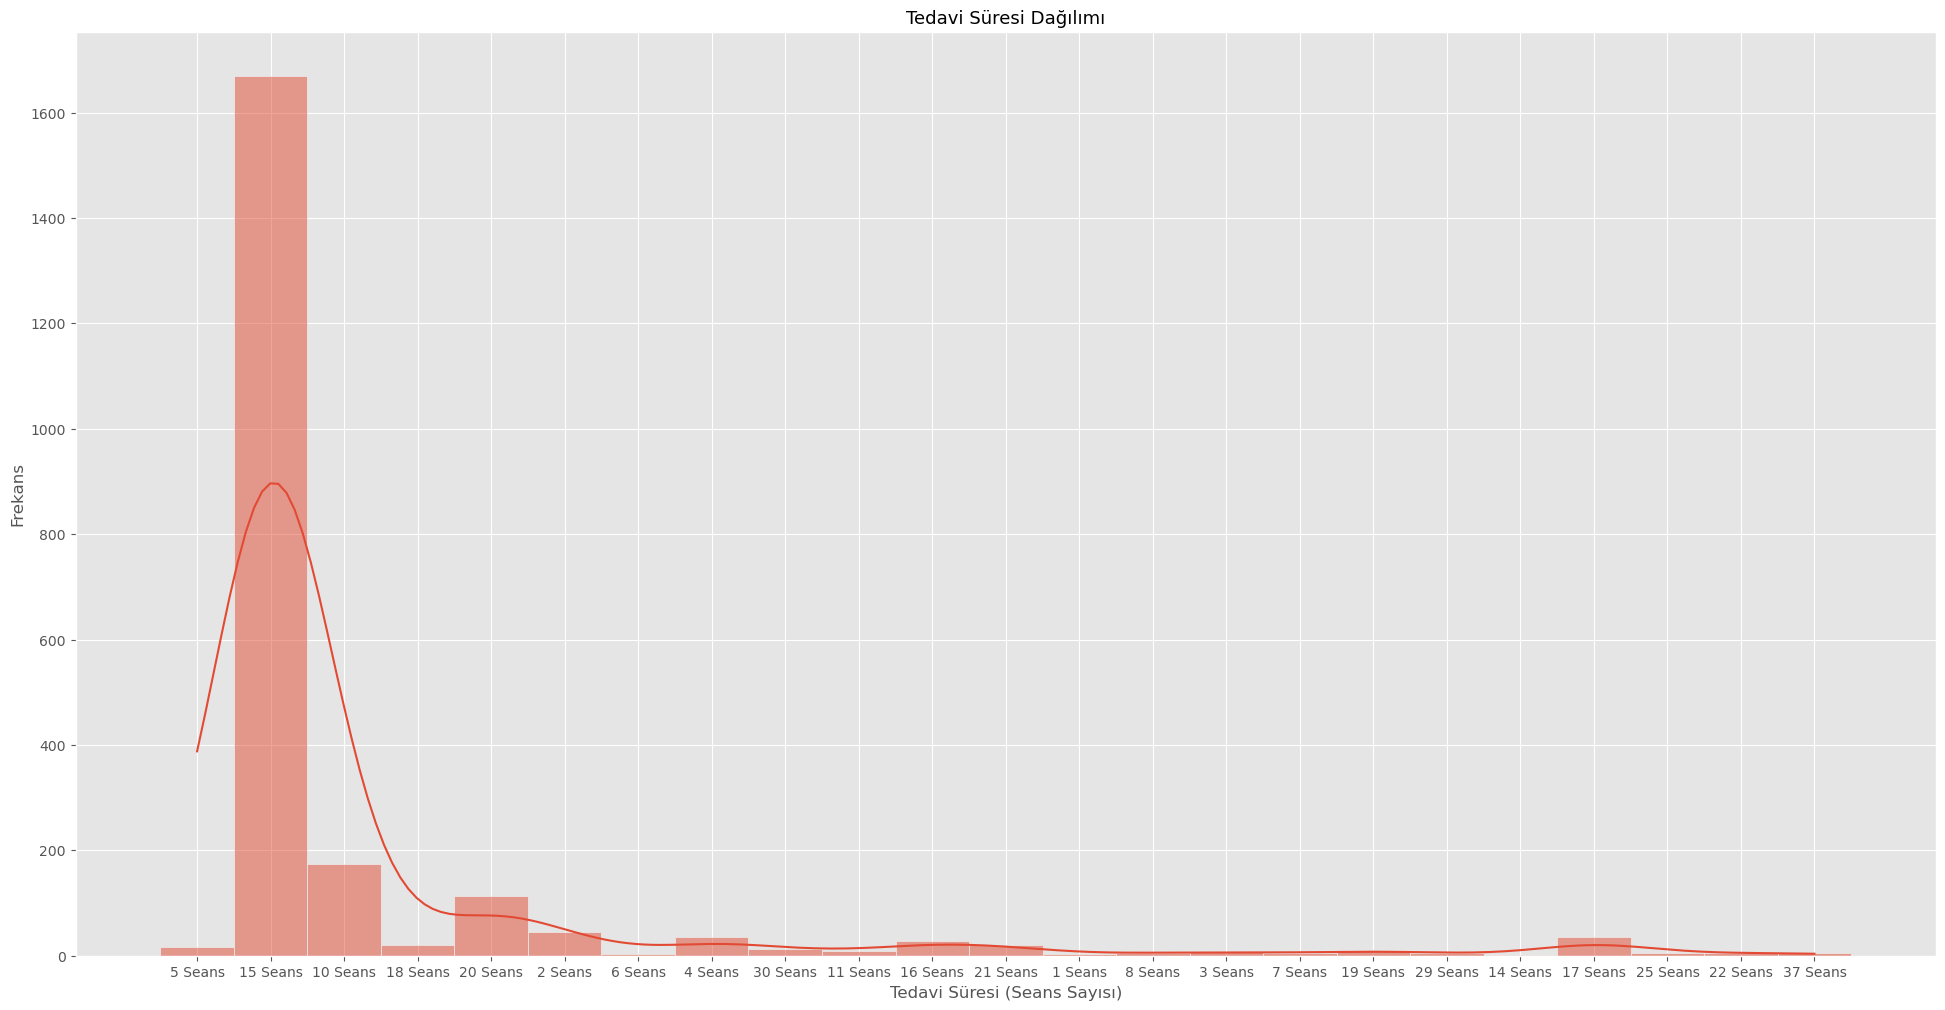

In [9]:
# Hedef değişkenimiz olan 'TedaviSuresi'nin dağılımını inceleyelim
plt.figure(figsize=(24, 12))
sns.histplot(df['TedaviSuresi'], bins=72, kde=True)
plt.title('Tedavi Süresi Dağılımı', fontsize=13)
plt.xlabel('Tedavi Süresi (Seans Sayısı)')
plt.ylabel('Frekans')
plt.show()

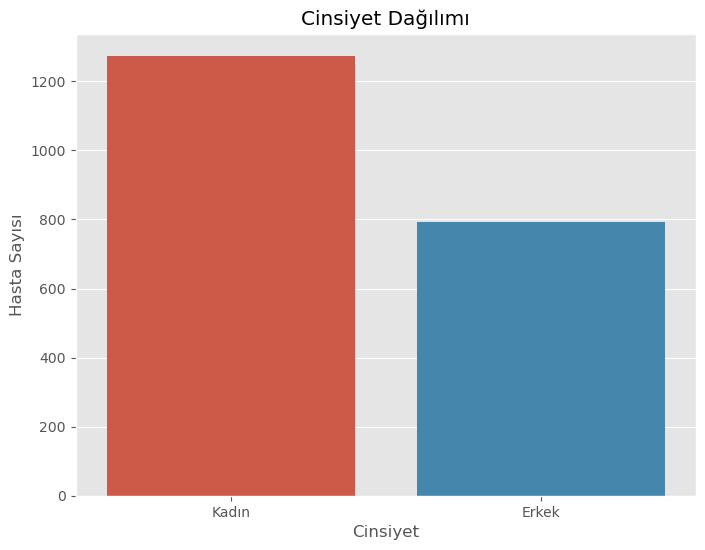

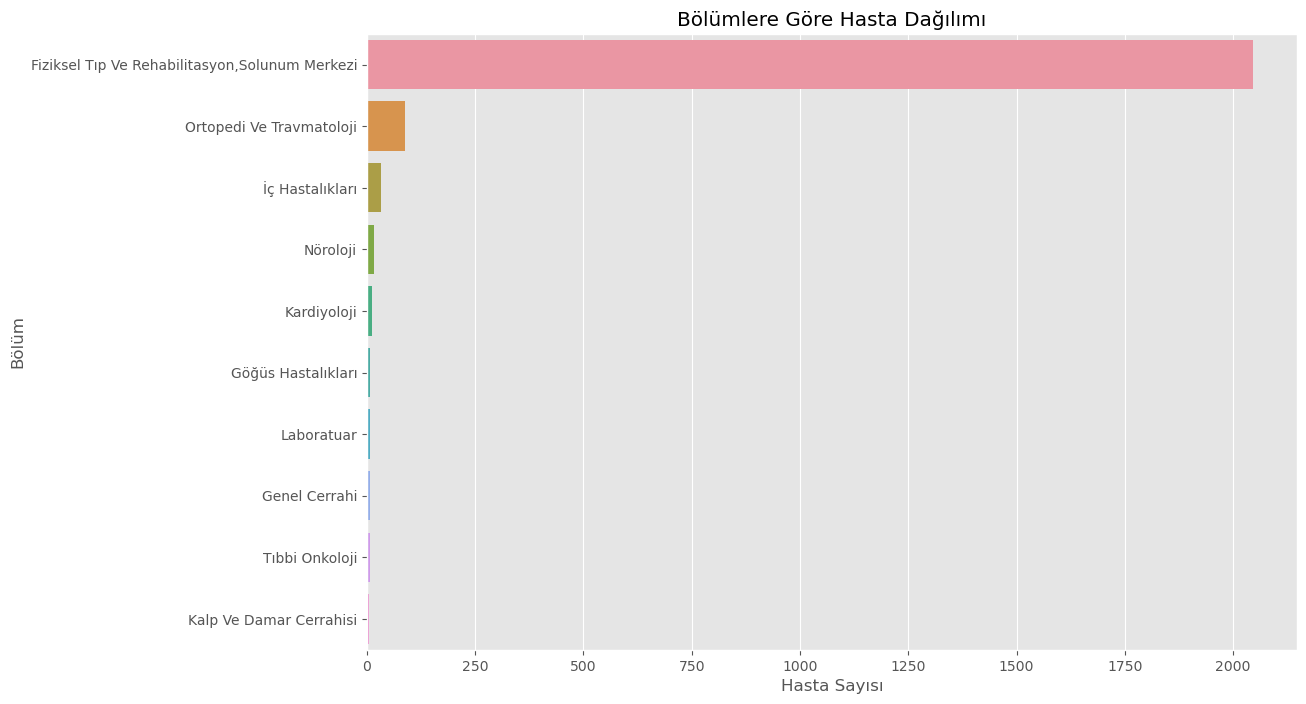

In [10]:
# Cinsiyet dağılımını inceleyelim
plt.figure(figsize=(8, 6))
sns.countplot(x='Cinsiyet', data=df)
plt.title('Cinsiyet Dağılımı')
plt.ylabel('Hasta Sayısı')
plt.show()

# Bölüm dağılımını inceleyelim
plt.figure(figsize=(12, 8))
sns.countplot(y='Bolum', data=df, order = df['Bolum'].value_counts().index)
plt.title('Bölümlere Göre Hasta Dağılımı')
plt.xlabel('Hasta Sayısı')
plt.ylabel('Bölüm')
plt.show()

In [11]:
# Eksik verilerin sayısını ve oranını hesaplayalım
eksik_veriler = df.isnull().sum()
eksik_veri_orani = (df.isnull().sum() / len(df)) * 100

eksik_veri_df = pd.DataFrame({
    'Eksik Değer Sayısı': eksik_veriler,
    'Eksik Değer Oranı (%)': eksik_veri_orani
})

# Sadece eksik veri içeren sütunları gösterelim
print(eksik_veri_df[eksik_veri_df['Eksik Değer Sayısı'] > 0].sort_values(by='Eksik Değer Sayısı', ascending=False))

                 Eksik Değer Sayısı  Eksik Değer Oranı (%)
Alerji                          944              42.237136
KanGrubu                        675              30.201342
KronikHastalik                  611              27.337808
UygulamaYerleri                 221               9.888143
Cinsiyet                        169               7.561521
Tanilar                          75               3.355705
Bolum                            11               0.492170


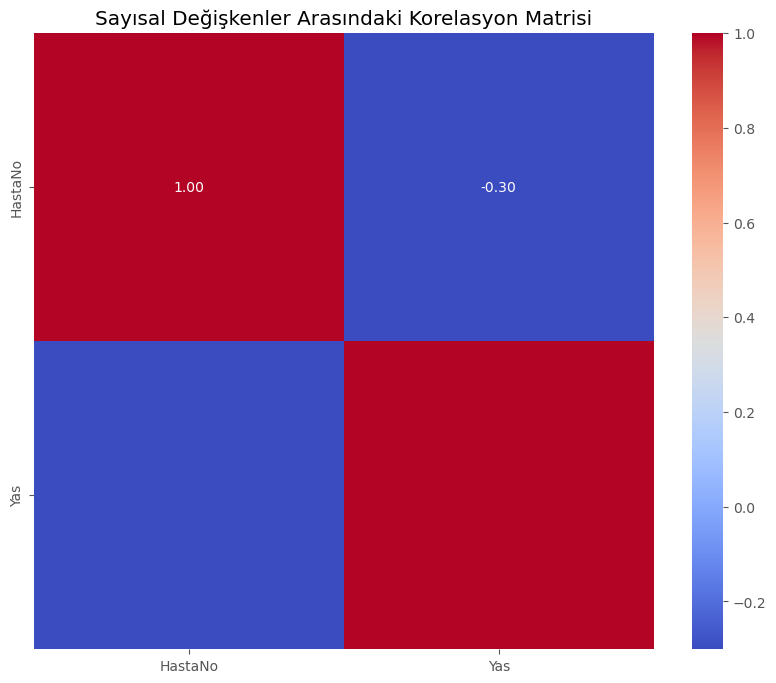

In [12]:
# Sayısal değişkenler arasındaki korelasyonu inceleyelim
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sayısal Değişkenler Arasındaki Korelasyon Matrisi')
plt.show()

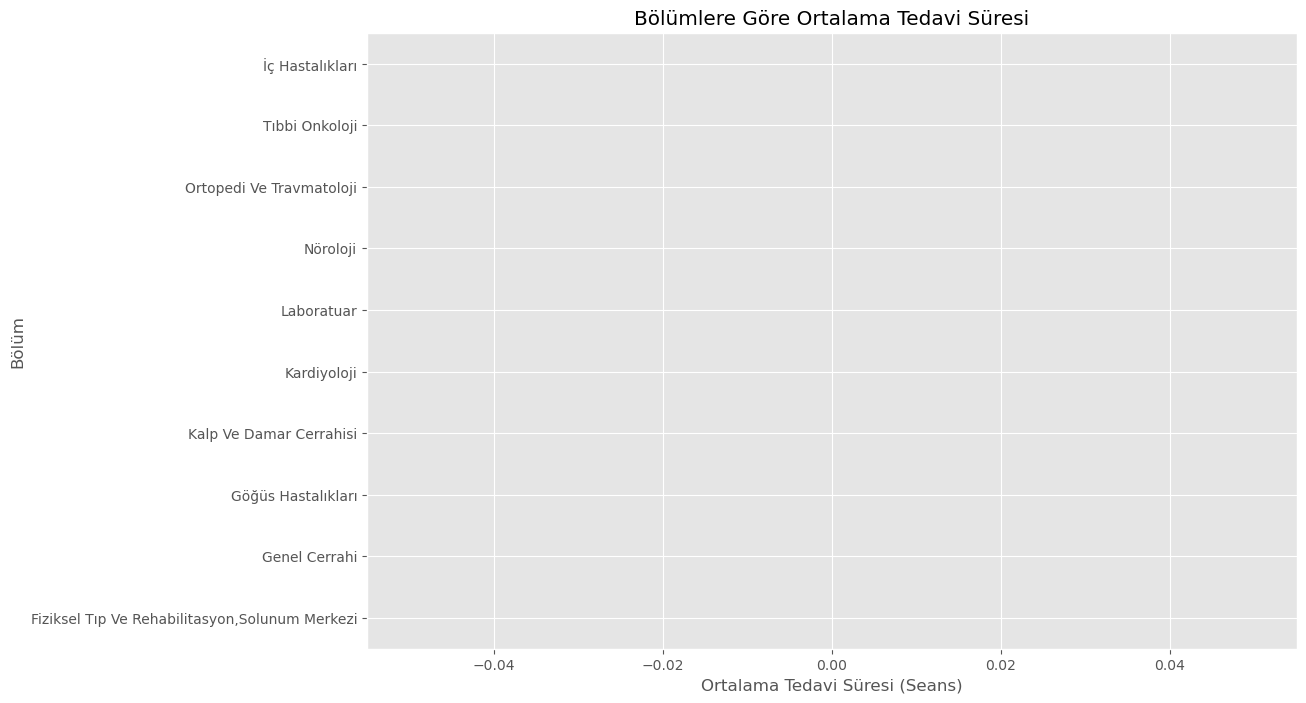

In [14]:
# Convert 'TedaviSuresi' to numeric, coercing errors to NaN
df['TedaviSuresi'] = pd.to_numeric(df['TedaviSuresi'], errors='coerce')

# Drop rows where 'TedaviSuresi' is NaN if you don't want them to affect the mean
# df.dropna(subset=['TedaviSuresi'], inplace=True)

# Now proceed with your plotting code
plt.figure(figsize=(12, 8))
df.groupby('Bolum')['TedaviSuresi'].mean().sort_values().plot(kind='barh')
plt.title('Bölümlere Göre Ortalama Tedavi Süresi')
plt.xlabel('Ortalama Tedavi Süresi (Seans)')
plt.ylabel('Bölüm')
plt.show()

In [34]:
# Orijinal DataFrame'i korumak için bir kopya oluşturalım
df_processed = df.copy()

In [35]:
# Yaşı 0 olan satır sayısını kontrol edelim
yas_sifir_sayisi = (df_processed['Yas'] == 0).sum()
print(f"'Yas' değeri 0 olan hasta sayısı: {yas_sifir_sayisi}")

# Yaşın medyan değerini hesaplayalım (0'ları hariç tutarak)
medyan_yas = df_processed[df_processed['Yas'] > 0]['Yas'].median()
print(f"Sıfır hariç medyan yaş: {medyan_yas}")

# 0 olan yaş değerlerini medyan ile değiştirelim
df_processed['Yas'] = df_processed['Yas'].replace(0, medyan_yas)

print(f"\nDüzeltme sonrası 'Yas' sütunundaki minimum değer: {df_processed['Yas'].min()}")

'Yas' değeri 0 olan hasta sayısı: 0
Sıfır hariç medyan yaş: 46.0

Düzeltme sonrası 'Yas' sütunundaki minimum değer: 2


In [36]:
# Alerji ve Kronik Hastalik'taki NaN değerleri 'Yok' ile dolduralım
df_processed['Alerji'].fillna('Yok', inplace=True)
df_processed['KronikHastalik'].fillna('Yok', inplace=True)

# KanGrubu ve Uyruk'taki NaN değerleri mod ile dolduralım
df_processed['KanGrubu'].fillna(df_processed['KanGrubu'].mode()[0], inplace=True)
df_processed['Uyruk'].fillna(df_processed['Uyruk'].mode()[0], inplace=True)

# UygulamaSuresi'ndeki NaN değerleri medyan ile dolduralım
# 1. 'UygulamaSuresi' Sütununu Temizleme ve Sayısal Formata Dönüştürme
# .str.extract('(\d+)') metodu ile metin içindeki sayıları (rakamları) çıkaralım.
# pd.to_numeric ile bu çıkarılan değerleri sayısal formata çevirelim.
# errors='coerce' parametresi, dönüştürülemeyen değerleri NaN (boş) olarak işaretler.
# Convert 'UygulamaSuresi' to string first to ensure .str accessor works, then extract and convert to numeric
df_processed['UygulamaSuresi'] = pd.to_numeric(
    df_processed['UygulamaSuresi'].astype(str).str.extract('(\d+)')[0],
    errors='coerce'
)

print("UygulamaSuresi sütunu sayısal formata dönüştürüldü.")
print("Dönüşüm sonrası veri tipi:", df_processed['UygulamaSuresi'].dtype)

uygulama_suresi_medyan = df_processed['UygulamaSuresi'].median()
df_processed['UygulamaSuresi'].fillna(uygulama_suresi_medyan, inplace=True)


# Kalan eksik verileri kontrol edelim
print("İşlem sonrası eksik veri durumu:")
print(df_processed.isnull().sum())

UygulamaSuresi sütunu sayısal formata dönüştürüldü.
Dönüşüm sonrası veri tipi: int64
İşlem sonrası eksik veri durumu:
HastaNo               0
Yas                   0
Cinsiyet            169
KanGrubu              0
Uyruk                 0
KronikHastalik        0
Bolum                11
Alerji                0
Tanilar              75
TedaviAdi             0
TedaviSuresi       2235
UygulamaYerleri     221
UygulamaSuresi        0
dtype: int64


In [38]:
# --- Kalan Eksik Verileri Doldurma ---

# 1. Kategorik sütunlardaki eksik verileri en sık tekrar eden değer (mod) ile dolduralım.
df_processed['Cinsiyet'].fillna(df_processed['Cinsiyet'].mode()[0], inplace=True)
df_processed['Bolum'].fillna(df_processed['Bolum'].mode()[0], inplace=True)

# 2. Metin tabanlı sütunlardaki eksik verileri 'Yok' ile dolduralım.
df_processed['Tanilar'].fillna('Yok', inplace=True)
df_processed['UygulamaYerleri'].fillna('Yok', inplace=True)

# 3. En Kritik Adım: Boş olan 'TedaviSuresi' sütununu orijinal veriden tekrar dolduralım.
# Orijinal veride de eksiklik olma ihtimaline karşı medyan ile doldurarak garantiliyoruz.
orijinal_tedavi_suresi_medyan = df['TedaviSuresi'].median()
df_processed['TedaviSuresi'] = df['TedaviSuresi'].fillna(orijinal_tedavi_suresi_medyan)

# --- SON KONTROL ---
print("Tüm eksik veri işlemleri tamamlandı. Son durum:")
print(df_processed.isnull().sum())

Tüm eksik veri işlemleri tamamlandı. Son durum:
HastaNo               0
Yas                   0
Cinsiyet              0
KanGrubu              0
Uyruk                 0
KronikHastalik        0
Bolum                 0
Alerji                0
Tanilar               0
TedaviAdi             0
TedaviSuresi       2235
UygulamaYerleri       0
UygulamaSuresi        0
dtype: int64


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HastaNo          2235 non-null   int64  
 1   Yas              2235 non-null   int64  
 2   Cinsiyet         2066 non-null   object 
 3   KanGrubu         1560 non-null   object 
 4   Uyruk            2235 non-null   object 
 5   KronikHastalik   1624 non-null   object 
 6   Bolum            2224 non-null   object 
 7   Alerji           1291 non-null   object 
 8   Tanilar          2160 non-null   object 
 9   TedaviAdi        2235 non-null   object 
 10  TedaviSuresi     0 non-null      float64
 11  UygulamaYerleri  2014 non-null   object 
 12  UygulamaSuresi   2235 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 227.1+ KB


In [ ]:
# 'Yok' değeri 0, diğerleri için ise listedeki eleman sayısını döndüren bir fonksiyon yazalım
def sayac_fonksiyonu(metin):
    if metin == 'Yok' or pd.isna(metin):
        return 0
    else:
        return len(str(metin).split(','))

# Yeni özellik sütunlarını oluşturalım
df_processed['KronikHastalikSayisi'] = df_processed['KronikHastalik'].apply(sayac_fonksiyonu)
df_processed['AlerjiSayisi'] = df_processed['Alerji'].apply(sayac_fonksiyonu)
df_processed['TaniSayisi'] = df_processed['Tanilar'].apply(sayac_fonksiyonu)

# Orijinal metin sütunlarını artık silebiliriz (eğer modelde kullanmayacaksak)
# df_processed.drop(['Kronik Hastalik', 'Alerji', 'Tanilar', 'Uygulama Yerleri'], axis=1, inplace=True)

# Yeni oluşturulan sütunlara göz atalım
print("Yeni oluşturulan özellikler:")
df_processed[['KronikHastalikSayisi', 'AlerjiSayisi', 'TaniSayisi']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HastaNo          2235 non-null   int64  
 1   Yas              2235 non-null   int64  
 2   Cinsiyet         2066 non-null   object 
 3   KanGrubu         1560 non-null   object 
 4   Uyruk            2235 non-null   object 
 5   KronikHastalik   1624 non-null   object 
 6   Bolum            2224 non-null   object 
 7   Alerji           1291 non-null   object 
 8   Tanilar          2160 non-null   object 
 9   TedaviAdi        2235 non-null   object 
 10  TedaviSuresi     0 non-null      float64
 11  UygulamaYerleri  2014 non-null   object 
 12  UygulamaSuresi   2235 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 227.1+ KB


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


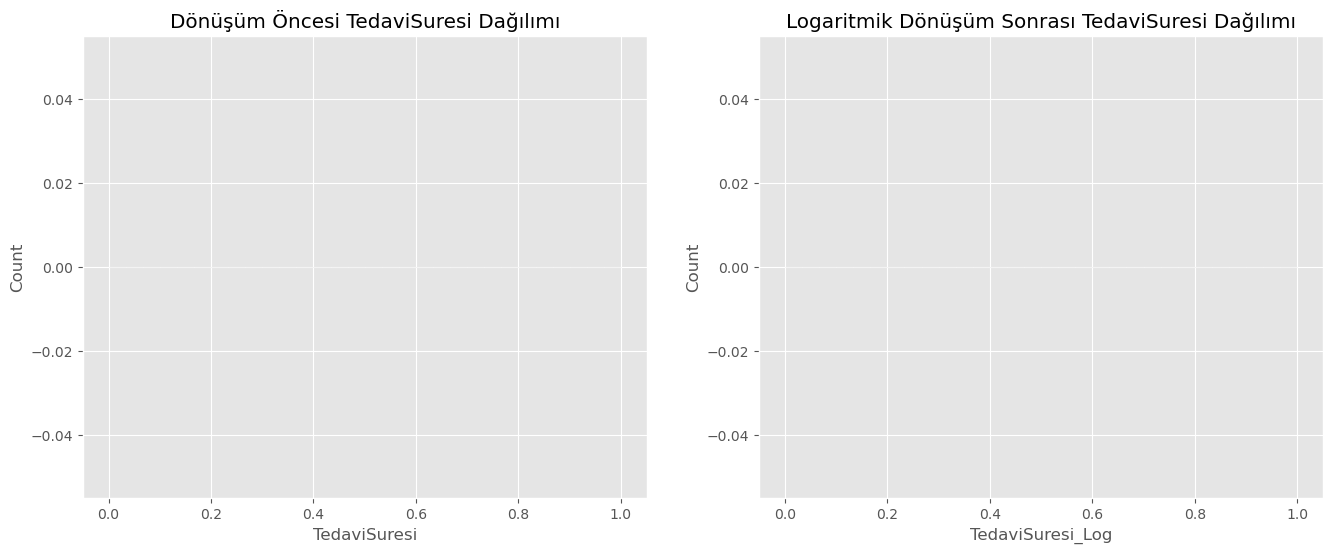

In [ ]:
# Logaritmik dönüşümden önceki ve sonraki dağılımı karşılaştıralım
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Orijinal dağılım
sns.histplot(df_processed['TedaviSuresi'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Dönüşüm Öncesi TedaviSuresi Dağılımı')

# Logaritmik dönüşüm (np.log1p, 0 değerlerini de handle etmek için kullanılır)
df_processed['TedaviSuresi_Log'] = np.log1p(df_processed['TedaviSuresi'])

# Dönüşüm sonrası dağılım
sns.histplot(df_processed['TedaviSuresi_Log'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Logaritmik Dönüşüm Sonrası TedaviSuresi Dağılımı')

plt.show()

In [ ]:
# One-Hot Encoding uygulanacak kategorik sütunları belirleyelim
kategorik_sutunlar = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum']

# pd.get_dummies fonksiyonu ile One-Hot Encoding işlemini yapalım
df_processed = pd.get_dummies(df_processed, columns=kategorik_sutunlar, drop_first=True)

# İşlem sonrası veri setinin ilk birkaç satırını ve bilgisini görelim
print("Kategorik Değişkenler Kodlandıktan Sonra Veri Seti:")
display(df_processed.head())

print("\nYeni Veri Seti Bilgileri:")
df_processed.info()

Kategorik Değişkenler Kodlandıktan Sonra Veri Seti:


,HastaNo,Yas,KronikHastalik,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,KronikHastalikSayisi,AlerjiSayisi,TaniSayisi,TedaviSuresi_Log,Cinsiyet_Kadın,KanGrubu_0 Rh-,KanGrubu_A Rh+,KanGrubu_A Rh-,KanGrubu_AB Rh+,KanGrubu_AB Rh-,KanGrubu_B Rh+,KanGrubu_B Rh-,Uyruk_Azerbaycan,Uyruk_Libya,Uyruk_Tokelau,Uyruk_Türkiye,Bolum_Genel Cerrahi,Bolum_Göğüs Hastalıkları,Bolum_Kalp Ve Damar Cerrahisi,Bolum_Kardiyoloji,Bolum_Laboratuar,Bolum_Nöroloji,Bolum_Ortopedi Ve Travmatoloji,Bolum_Tıbbi Onkoloji,Bolum_İç Hastalıkları
0,145134,60,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,NaN,Ayak Bileği,20,3,1,1,NaN,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,NaN,Boyun,20,4,0,4,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,NaN,"Boyun,Sırt",20,4,0,4,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,NaN,Boyun,5,4,0,4,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,NaN,"Boyun,Sırt",20,4,0,4,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False



Yeni Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HastaNo                         2235 non-null   int64  
 1   Yas                             2235 non-null   int64  
 2   KronikHastalik                  2235 non-null   object 
 3   Alerji                          2235 non-null   object 
 4   Tanilar                         2160 non-null   object 
 5   TedaviAdi                       2235 non-null   object 
 6   TedaviSuresi                    0 non-null      float64
 7   UygulamaYerleri                 2014 non-null   object 
 8   UygulamaSuresi                  2235 non-null   int64  
 9   KronikHastalikSayisi            2235 non-null   int64  
 10  AlerjiSayisi                    2235 non-null   int64  
 11  TaniSayisi                      2235 non-null   int64  
 12  TedaviS

In [ ]:
# ADIM 1: Orijinal 'TedaviSuresi' sütununda eksik veri var mı diye kontrol edelim.
# Eğer varsa, bu eksik değerleri doldurmamız gerekir.
orijinal_tedavi_suresi_medyan = df['TedaviSuresi'].median()
df_processed['TedaviSuresi'] = df['TedaviSuresi'].fillna(orijinal_tedavi_suresi_medyan)

# ADIM 2: Logaritmik dönüşümü tekrar uyguladım.
# Önceki boş sütunu silip yenisini oluşturalım ki karışıklık olmasın.
df_processed.drop(['TedaviSuresi_Log'], axis=1, inplace=True)
df_processed['TedaviSuresi_Log'] = np.log1p(df_processed['TedaviSuresi'])

# ADIM 3: Artık logaritmik dönüşüm yapılmış hedef değişkenimiz olduğuna göre,
# orijinal 'TedaviSuresi' sütununa ihtiyacımız kalmadı. Onu silebiliriz.
df_processed.drop('TedaviSuresi', axis=1, inplace=True)

print("Hedef değişken 'TedaviSuresi_Log' başarıyla oluşturuldu.")
print(df_processed[['TedaviSuresi_Log']].head())

Hedef değişken 'TedaviSuresi_Log' başarıyla oluşturuldu.
   TedaviSuresi_Log
0               NaN
1               NaN
2               NaN
3               NaN
4               NaN


In [ ]:
# 'UygulamaYerleri' ve 'Tanilar' için de sayı sayma işlemi yapdım.
# Önce eksik değerleri 'Yok' ile doldurdum.
df_processed['UygulamaYerleri'].fillna('Yok', inplace=True)
df_processed['Tanilar'].fillna('Yok', inplace=True)

# Sayılarını hesaplayarak yeni sütunlar oluşturdum.
df_processed['UygulamaYeriSayisi'] = df_processed['UygulamaYerleri'].apply(sayac_fonksiyonu)

# Modelin işleyemeyeceği tüm object tipli sütunları ve gereksiz ID sütununu kaldırıldı. Gerekli işlemler için one-hot encoding veya başka dönüşümler yapılabilir.
#Ben şimdilik kaldırdım.
sutunleri_kaldir = ['KronikHastalik', 'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri', 'HastaNo']
df_processed.drop(sutunleri_kaldir, axis=1, inplace=True)

print("Tüm 'object' tipli ve gereksiz ID sütunları kaldırıldı.")

Tüm 'object' tipli ve gereksiz ID sütunları kaldırıldı.


In [ ]:
print("--- VERİ ÖN İŞLEME TAMAMLANDI ---")
print("\nVeri Setinin Son Hali (info):")
df_processed.info()

print("\nVeri Setinin Son Hali (head):")
df_processed.head()

--- VERİ ÖN İŞLEME TAMAMLANDI ---

Veri Setinin Son Hali (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Yas                             2235 non-null   int64  
 1   UygulamaSuresi                  2235 non-null   int64  
 2   KronikHastalikSayisi            2235 non-null   int64  
 3   AlerjiSayisi                    2235 non-null   int64  
 4   TaniSayisi                      2235 non-null   int64  
 5   Cinsiyet_Kadın                  2235 non-null   bool   
 6   KanGrubu_0 Rh-                  2235 non-null   bool   
 7   KanGrubu_A Rh+                  2235 non-null   bool   
 8   KanGrubu_A Rh-                  2235 non-null   bool   
 9   KanGrubu_AB Rh+                 2235 non-null   bool   
 10  KanGrubu_AB Rh-                 2235 non-null   bool   
 11  KanGrubu_B Rh+                

,Yas,UygulamaSuresi,KronikHastalikSayisi,AlerjiSayisi,TaniSayisi,Cinsiyet_Kadın,KanGrubu_0 Rh-,KanGrubu_A Rh+,KanGrubu_A Rh-,KanGrubu_AB Rh+,KanGrubu_AB Rh-,KanGrubu_B Rh+,KanGrubu_B Rh-,Uyruk_Azerbaycan,Uyruk_Libya,Uyruk_Tokelau,Uyruk_Türkiye,Bolum_Genel Cerrahi,Bolum_Göğüs Hastalıkları,Bolum_Kalp Ve Damar Cerrahisi,Bolum_Kardiyoloji,Bolum_Laboratuar,Bolum_Nöroloji,Bolum_Ortopedi Ve Travmatoloji,Bolum_Tıbbi Onkoloji,Bolum_İç Hastalıkları,TedaviSuresi_Log,UygulamaYeriSayisi
0,60,20,3,1,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,1
1,28,20,4,0,4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,1
2,28,20,4,0,4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,2
3,28,5,4,0,4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,1
4,28,20,4,0,4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,2
